# Signal files
First let's look at the available signal files

You can to this by running the command in the terminal:

`eosls /store/user/cmsdas/2024/short_exercises/tagging/`

You will find the following signal files:
- BulkGravToZZ_tree.root
- BulkGravTohh_tree.root
- BulkGravTohh_tree_noc.root
- ZprimeToTT_tree.root
- ZprimeToWW_tree.root

And QCD bacqground: 
- qcd-pythia_tree.root
- qcd-pythia_tree_SLIM.root
- qcd-pythia_tree_noc.root

# Convert tree to dataframe with `uproot`
Open the file with `uproot` and convert the tree to a `pandas` dataframe.

In [1]:
## this step may take some time 

import uproot

#!pip install lz4 --user
#!pip install xxhash --user
filename_hh = 'root://cmseos.fnal.gov//store/user/cmsdas/2024/short_exercises/tagging/BulkGravTohh_tree_noc.root'
filename_qcd = 'root://cmseos.fnal.gov//store/user/cmsdas/2024/short_exercises/tagging/qcd-pythia_tree_SLIM.root'

uptree_hh = uproot.open(filename_hh)["Friends"]
uptree_qcd = uproot.open(filename_qcd)["Friends"]

branches = ['ak8_nn_HbbvsQCD',
            'ak8_decorr_nn_ZHbbvsQCD',
            'ak8_doubleb',
            'ak8_tau21',
            'ak8_ecfN2',
            'ak8_bestH',
            'ak8_sdmass',
            'ak8_pt',
            'ak8_eta',
            'gen_pt',
            'gen_eta']


print("get hh")
# df_hh = uptree_hh.pandas.df(branches=branches+['rewgt'])
df_hh = uptree_hh.arrays(branches+['rewgt'], library="pd")
print(df_hh)

print("get QCD")
df_qcd = uptree_qcd.arrays(branches+['genweight'], library="pd")
print(df_qcd)

get hh
         ak8_nn_HbbvsQCD  ak8_decorr_nn_ZHbbvsQCD  ak8_doubleb  ak8_tau21  \
0               0.994166                 0.824241    -0.368652   0.318511   
1               0.020274                 0.561969    -0.091064   0.768031   
2               0.996014                 0.965141     0.472656   0.347771   
3               0.085849                 0.793424     0.773926   0.765903   
4               0.741384                 0.664981     0.034668   0.595010   
...                  ...                      ...          ...        ...   
1492186         0.981776                 0.838215     0.964355   0.262172   
1492187         0.206168                 0.000002     0.919434   0.813088   
1492188         0.608487                 0.523126     0.806152   0.558550   
1492189         0.504012                 0.729845    -0.031616   0.522162   
1492190         0.800428                 0.762689     0.687988   0.621493   

         ak8_ecfN2  ak8_bestH  ak8_sdmass  ak8_pt   ak8_eta  gen_pt 

# Apply cuts and merge dataframes
Let's apply the same fiducial cuts and merge the signal and background dataframes

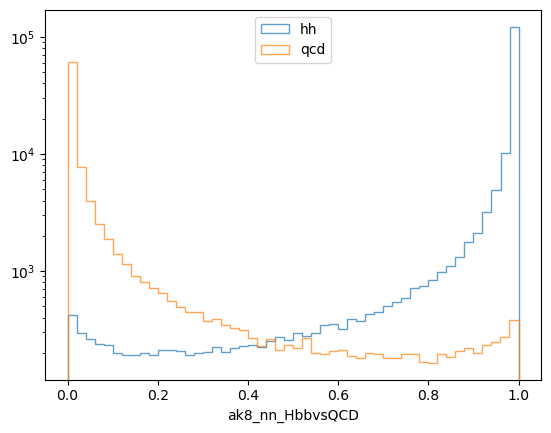

,ak8_nn_HbbvsQCD,ak8_decorr_nn_ZHbbvsQCD,ak8_doubleb,ak8_tau21,ak8_ecfN2,ak8_bestH,ak8_sdmass,ak8_pt,ak8_eta,gen_pt,gen_eta,rewgt,sample_weight,label,genweight
71,0.997910,0.966018,0.639648,0.312356,0.237549,0.968759,114.324455,943.5,0.473999,1036.0,0.459961,0.003346,3.346120e-03,1,NaN
155,0.991485,0.984800,0.410645,0.629371,0.277100,0.045536,70.636497,1224.0,-0.284180,1416.0,-0.282227,0.000380,3.804002e-04,1,NaN
276,0.998709,0.902522,-0.010880,0.182233,0.177124,0.312264,139.366959,1187.0,0.049248,1120.0,0.045898,0.001986,1.986259e-03,1,NaN
843,0.998738,0.956193,0.919434,0.292515,0.231079,0.981281,122.679993,957.5,0.962158,1022.0,0.958984,0.003346,3.346120e-03,1,NaN
1680,0.997370,0.995647,0.356201,0.584867,0.327881,0.163290,71.869606,1044.0,0.221252,1132.0,0.230469,0.001986,1.986259e-03,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612709,0.032039,0.013714,-0.808594,0.367254,0.233032,0.010093,148.619888,881.0,-0.100525,1232.0,-0.031982,NaN,3.253174e-12,0,3.253174e-12
1612719,0.000976,0.044383,-0.832031,0.362534,0.254883,0.018189,165.783401,1306.0,0.486206,1104.0,0.117920,NaN,6.240069e-12,0,6.240069e-12
1612754,0.027902,0.048464,-0.942871,0.538784,0.324951,0.006457,152.791931,909.5,0.846069,1304.0,1.121094,NaN,2.333564e-12,0,2.333564e-12
1612803,0.001519,0.000999,-0.928711,0.628799,0.363770,0.016806,77.016121,1299.0,0.860229,1348.0,0.851562,NaN,1.905873e-12,0,1.905873e-12


In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
# mask higgs outside of fiducial cuts
mask_hh = (df_hh['gen_pt'] > 1000) & (df_hh['gen_pt'] < 1500) & (np.abs(df_hh['gen_eta']) < 2.4) & (df_hh['ak8_sdmass'] > 40) & (df_hh['ak8_sdmass'] < 200)
df_hh = df_hh[mask_hh]
df_hh['sample_weight'] = df_hh['rewgt']
df_hh['label'] = np.ones((len(df_hh)),dtype=int)

# mask qcd outside of fiducial cuts
mask_qcd = (df_qcd['gen_pt'] > 1000) & (df_qcd['gen_pt'] < 1500) & (np.abs(df_qcd['gen_eta']) < 2.4) & (df_qcd['ak8_sdmass'] > 40) & (df_qcd['ak8_sdmass'] < 200)
df_qcd = df_qcd[mask_qcd]
df_qcd['sample_weight'] = df_qcd['genweight']
df_qcd['label'] = np.zeros((len(df_qcd)),dtype=int)


# df_hh["ak8_nn_HbbvsQCD"].plot(x='ak8_nn_HbbvsQCD', kind='bar')
# plt.show()
plt.hist(df_hh['ak8_nn_HbbvsQCD'], bins=50, alpha=0.7, label='hh', histtype='step')
plt.hist(df_qcd['ak8_nn_HbbvsQCD'], bins=50, alpha=0.7, label='qcd', histtype='step')
plt.xlabel('ak8_nn_HbbvsQCD')
plt.yscale('log')
# plt.ylabel('Frequency')
# plt.title('Distribution of ak8_pt')
plt.legend()
plt.show()


# concatenate signal and background
df = pandas.concat([df_hh,df_qcd])

df

# Plot ROCs

Plot the ROC for one of the tagging variables. We'll plot the true-positive rate (TPR) vs. the false-positive rate (FPR).

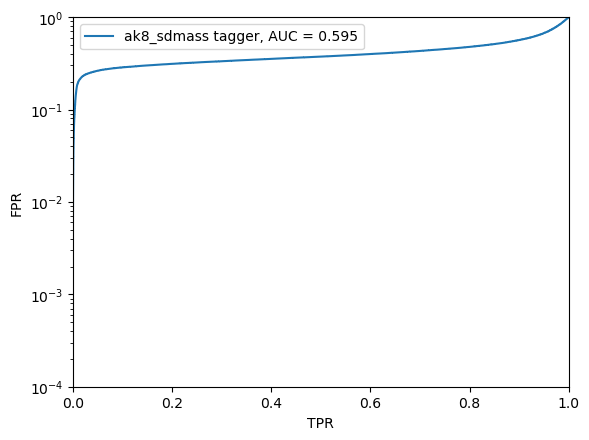

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline
fpr = {}
tpr = {}
threshold = {}
plt.figure()

tagger = 'ak8_sdmass'
fpr[tagger], tpr[tagger], threshold[tagger] = roc_curve(df['label'], df[tagger], sample_weight=df['sample_weight'])
myauc = auc(fpr[tagger], tpr[tagger]) #,reorder=True)
plt.plot(tpr[tagger],fpr[tagger],label='%s tagger, AUC = %.3f'%(tagger, myauc))

plt.legend(loc='best')
plt.semilogy()
plt.xlim([0, 1])
plt.ylim([1e-4, 1])
plt.xlabel("TPR");
plt.ylabel("FPR");

# Checkpoint: 

Compare performance of other tagging algorithms.

In [ ]:
## place holder for checkpoint

# Train your own simple tagger

Train your own simple tagger with keras.

Before you execute the next cells, you need to install keras and tensorflow. 
You can do this from the terminal running:

`pip3 install keras`

`pip3 install tensorflow`

You will need to start and stop the kernel.

In [1]:
import keras
from keras.models import Model
from keras.layers import Input, Activation, Dense

inputs = Input(shape=(2,), name = 'input')  
x = Dense(5, name = 'dense_1', activation = 'relu')(inputs)
outputs = Dense(1, name = 'output', activation='sigmoid')(x)

# create the model
model = Model(inputs=inputs, outputs=outputs)
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model.summary()

ImportError: /home/izoi/.local/lib/python3.10/site-packages/tensorflow/python/platform/../_pywrap_tensorflow_internal.so: undefined symbol: _ZN10tensorflow10OpRegistry8RegisterERKSt8functionIFN4absl12lts_202308026StatusEPNS_18OpRegistrationDataEEE

In [ ]:
x = np.vstack([df['ak8_sdmass'], df['ak8_tau21']]).T
print(x.shape)
y = df['label']
print(y.shape)
model.fit(x,y, epochs=1)
df['ak8_sdmass_tau21'] = model.predict(x)

We'll use the result of this training in exercise 3 below.

# Exercises

 - Exercise 1: Plot all of the taggers on the same ROC curve
 - Exercise 2 [done above, feel free to improve/play around]: Train your own custom "traditional" tagger based on mSD and tau21
 - Exercise 3: Add your tagger to the ROC curve
 - Exercise 4: Repeat with a different signal sample (W, Z, or top)
 - Exercise 5 [advanced]: Understand the impact of different sets of inputs in the jet classification problem
 - Exercise 6 [extra]: Look at the 'ak8_sdmass' distribution of signal and background after applying different cuts on the other taggers. Thoughts, ideas, concerns ?
